Praktikum BOW (1)
=============================

In [ ]:
# Menghubungkan Google Drive ke Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu4/bow-tfidf/data/clean_dataset_stem.csv',sep=';')

In [ ]:
dataset.shape

(902, 10)

In [ ]:
dataset.head(10)

,Unnamed: 0.1,Unnamed: 0,Tweet,Sentimen,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,0,0,"Cegah mata rantai Covid-19,mari kita dirumah s...",1.0,cegah mata rantai covid mari kita dirumah sa...,"['cegah', 'mata', 'rantai', 'covid', 'mari', '...","['cegah', 'mata', 'rantai', 'covid', 'mari', '...",cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid mari kita dirumah saja...,cegah mata rantai covid kita rumah hingga hari...
1,1,1,aku mohon yaAllah semoga wabah covid-19 menghi...,1.0,aku mohon yaallah semoga wabah covid menghil...,"['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...","['aku', 'mohon', 'yaallah', 'semoga', 'wabah',...",aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah semoga wabah covid menghilan...,aku mohon yaallah moga wabah covid hilang rama...
2,2,2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,1.0,pemprov papua naikkan status jadi tanggap daru...,"['pemprov', 'papua', 'naikkan', 'status', 'jad...","['pemprov', 'papua', 'naikkan', 'status', 'jad...",pemprov papua naikkan status jadi tanggap daru...,pemprov papua naikkan status jadi tanggap daru...,pemprov papua naik status jadi tanggap darurat...
3,3,3,Covid belum nyampe prigen mbak hmm hoax,0.0,covid belum nyampe prigen mbak hmm hoax,"['covid', 'belum', 'nyampe', 'prigen', 'mbak',...","['covid', 'belum', 'nyampe', 'prigen', 'mbak',...",covid belum nyampe prigen mbak hmm hoax,covid belum nyampe prigen mbak hmm hoax,covid nyampe prigen mbak hmm hoax
4,4,4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...",-1.0,nyuruh orang pintar lu aja togog itu kerumunan...,"['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...","['nyuruh', 'orang', 'pintar', 'lu', 'aja', 'to...",nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog itu kerumunan...,nyuruh orang pintar lu aja togog kerumun orang...
5,5,5,Pikir2 balik byk mnde plk nk setelkn lepas covid.,0.0,pikir balik byk mnde plk nk setelkn lepas covid,"['pikir', 'balik', 'byk', 'mnde', 'plk', 'nk',...","['pikir', 'balik', 'byk', 'mnde', 'plk', 'nk',...",pikir balik byk mnde plk nk setelkn lepas covid,pikir balik byk mnde plk nk setelkn lepas covid,pikir balik byk mnde plk nk setelkn lepas covid
6,6,6,"Selamat pagi, hari jum'at. Jum'at keempat di k...",1.0,selamat pagi hari jumat jumat keempat di kala ...,"['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...","['selamat', 'pagi', 'hari', 'jumat', 'jumat', ...",selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat keempat di kala ...,selamat pagi hari jumat jumat empat kala pande...
7,7,7,"Hikmah di balik musibah covid-19, smg para pej...",1.0,hikmah di balik musibah covid smg para pejab...,"['hikmah', 'di', 'balik', 'musibah', 'covid', ...","['hikmah', 'di', 'balik', 'musibah', 'covid', ...",hikmah di balik musibah covid smg para pejabat...,hikmah di balik musibah covid smg para pejabat...,hikmah balik musibah covid smg jabat perintah ...
8,8,8,Cegah covid-19 beserta jajaran Polsek Kuranji ...,1.0,cegah covid beserta jajaran polsek kuranji m...,"['cegah', 'covid', 'beserta', 'jajaran', 'pols...","['cegah', 'covid', 'beserta', 'jajaran', 'pols...",cegah covid beserta jajaran polsek kuranji mel...,cegah covid beserta jajaran polsek kuranji mel...,cegah covid serta jajar polsek ranji laku aksi...
9,9,9,Ya Allah kami memohon pada mu perkenankanlah d...,1.0,ya allah kami memohon pada mu perkenankanlah d...,"['ya', 'allah', 'kami', 'memohon', 'pada', 'mu...","['ya', 'allah', 'kami', 'memohon', 'pada', 'mu...",ya allah kami memohon pada mu perkenankanlah d...,ya allah kami memohon pada mu perkenankanlah d...,allah mohon mu kenan doa doa rana sungguh engk...


In [ ]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [ ]:
dataset_label = dataset['Sentimen']

In [ ]:
dataset_feature

,ProcessedText
0,cegah mata rantai covid kita rumah hingga hari...
1,aku mohon yaallah moga wabah covid hilang rama...
2,pemprov papua naik status jadi tanggap darurat...
3,covid nyampe prigen mbak hmm hoax
4,nyuruh orang pintar lu aja togog kerumun orang...
...,...
897,seluruh negara dunia alami masa sulit covid ra...
898,covid skripsi disaster selesai mau bgt bljr ma...
899,malam projek benda bincang malam fb satu belia...
900,pontang panting koyak covid


In [ ]:
dataset_label

,Sentimen
0,1.0
1,1.0
2,1.0
3,0.0
4,-1.0
...,...
897,1.0
898,1.0
899,0.0
900,-1.0


# cek distribusi label

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipython-input-3253511717.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


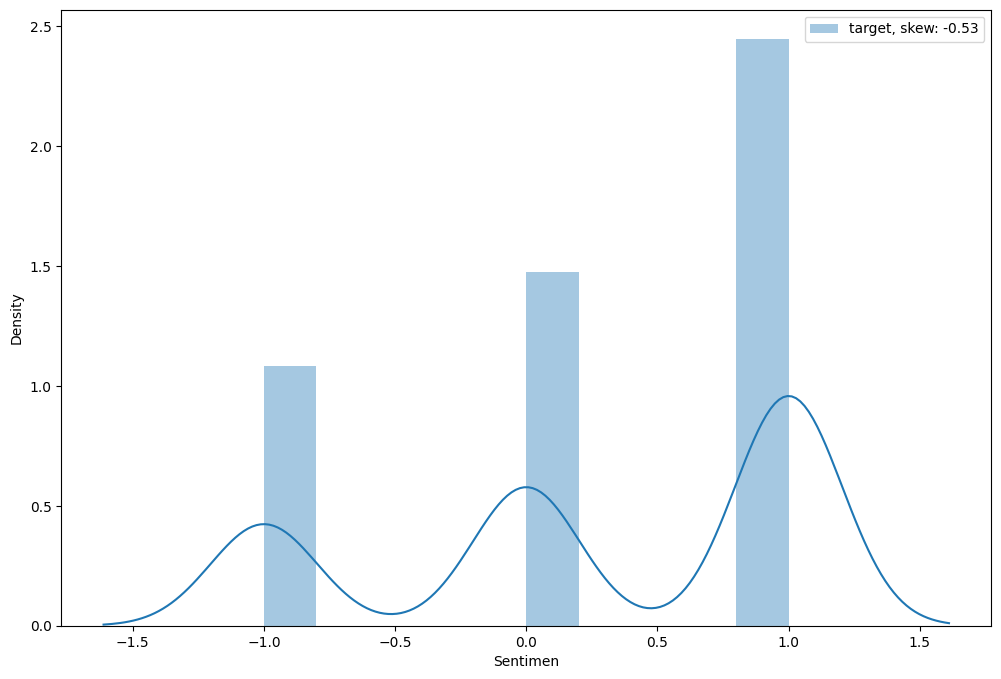

In [ ]:
# Memvisualisasikan variabel target
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [ ]:
dataset_label.value_counts()

,count
Sentimen,
1.0,441
0.0,266
-1.0,195


# BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(dataset_feature)

In [ ]:
print(vectorizer.get_feature_names_out())

['aa' 'aamiin' 'aamiingimana' ... 'zmn' 'zona' 'zone']


In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [ ]:
X2 = vectorizer2.fit_transform(dataset_feature)

In [ ]:
print(vectorizer2.get_feature_names_out())

['aa warga' 'aamiin aamiin' 'aamiin gimana' ... 'zmn pkp' 'zona hijau'
 'zone covid']


In [ ]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Simulasi Corpus

In [ ]:
corpus = [
    'Ini adalah dokumen pertama.',
    'Dokumen ini adalah dokumen kedua.',
    'Dan ini adalah dokumen ketiga.',
    'Apakah ini dokumen pertama?',
]

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
Z = vectorizer.fit_transform(corpus)

In [ ]:
vectorizer.get_feature_names_out()

array(['adalah', 'apakah', 'dan', 'dokumen', 'ini', 'kedua', 'ketiga',
       'pertama'], dtype=object)

In [ ]:
print(Z.toarray())

[[1 0 0 1 1 0 0 1]
 [1 0 0 2 1 1 0 0]
 [1 0 1 1 1 0 1 0]
 [0 1 0 1 1 0 0 1]]


In [ ]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [ ]:
Z2 = vectorizer2.fit_transform(corpus)

In [ ]:
vectorizer2.get_feature_names_out()

array(['adalah dokumen', 'apakah ini', 'dan ini', 'dokumen ini',
       'dokumen kedua', 'dokumen ketiga', 'dokumen pertama', 'ini adalah',
       'ini dokumen'], dtype=object)

In [ ]:
print(Z2.toarray())

[[1 0 0 0 0 0 1 1 0]
 [1 0 0 1 1 0 0 1 0]
 [1 0 1 0 0 1 0 1 0]
 [0 1 0 0 0 0 1 0 1]]
